In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("C:\\Downloads\\internship.csv")

In [3]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
df = df.round(2)

In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
print("Mean: "+str(round(df['MINIMUM_PAYMENTS'].mean(), 2)))
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(round(df['MINIMUM_PAYMENTS'].mean(), 2))

Mean: 864.21


In [7]:
df['CREDIT_LIMIT'].value_counts()

3000.00     784
1500.00     722
1200.00     621
1000.00     614
2500.00     612
           ... 
5550.00       1
7227.27       1
1250.00       1
10200.00      1
6250.00       1
Name: CREDIT_LIMIT, Length: 205, dtype: int64

In [8]:
print("Mean: "+str(round(df['CREDIT_LIMIT'].mean(), 2)))
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(round(df['CREDIT_LIMIT'].mean(), 2))

Mean: 4494.45


In [9]:
del df['CUST_ID']
df.shape

(8950, 17)

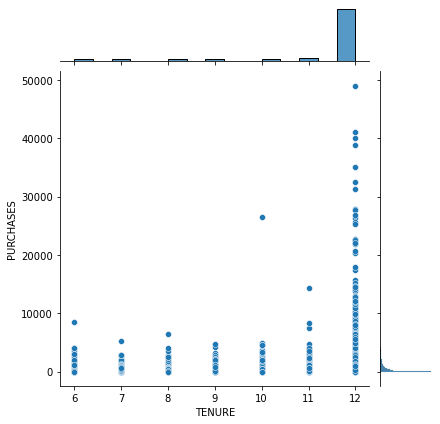

In [10]:
sns.jointplot(x='TENURE', y='PURCHASES', data=df)

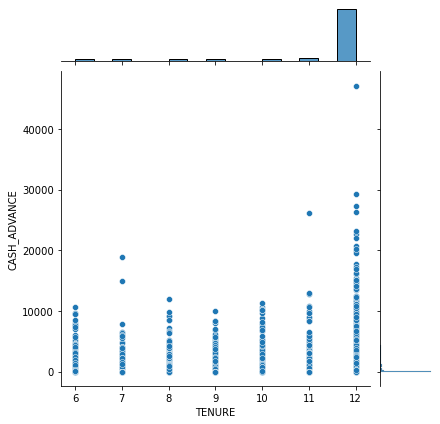

In [11]:
sns.jointplot(x='TENURE', y='CASH_ADVANCE', data=df)

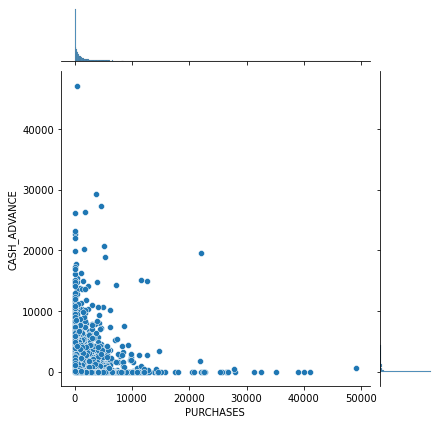

In [12]:
sns.jointplot(x='PURCHASES', y='CASH_ADVANCE', data=df)

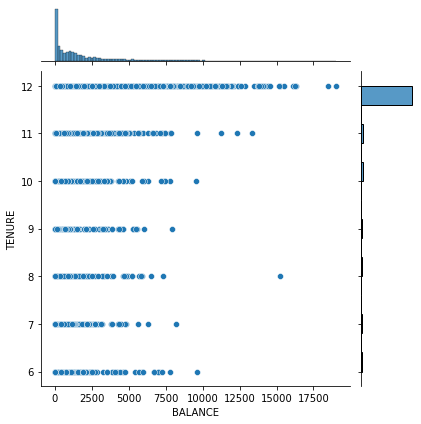

In [13]:
sns.jointplot(x='BALANCE', y='TENURE', data=df)

People with 12 as tenure tend to have more balance in their account - Customer Loyalty

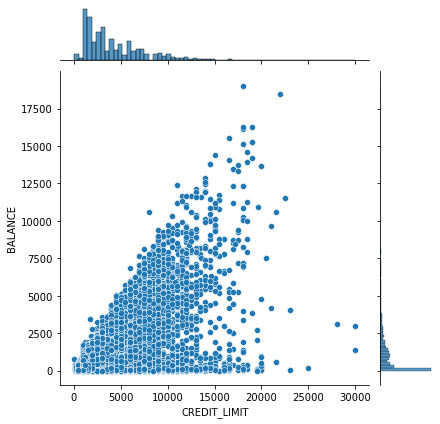

In [14]:
sns.jointplot(x='CREDIT_LIMIT', y='BALANCE', data=df)

Most customers lie in and under 15000 credit limit and 10K balance
others can be considered as premium customers

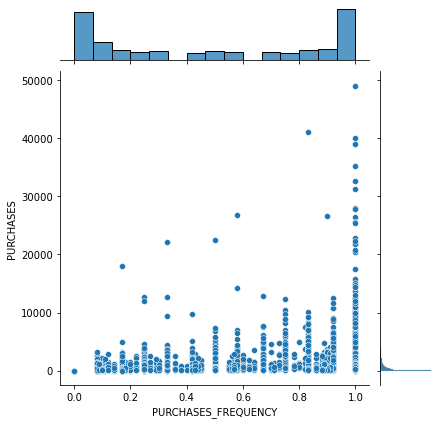

In [16]:
sns.jointplot(x='PURCHASES_FREQUENCY', y='PURCHASES', data=df)

Customers with more range of frequency have higher amount of purchases

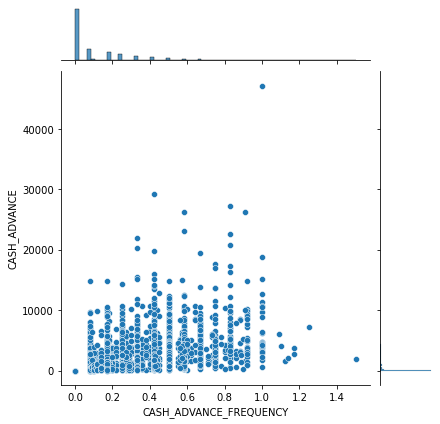

In [17]:
sns.jointplot(x='CASH_ADVANCE_FREQUENCY', y='CASH_ADVANCE', data=df)

CASH ADVANCES of most customers are below or around 10k 

<AxesSubplot:>

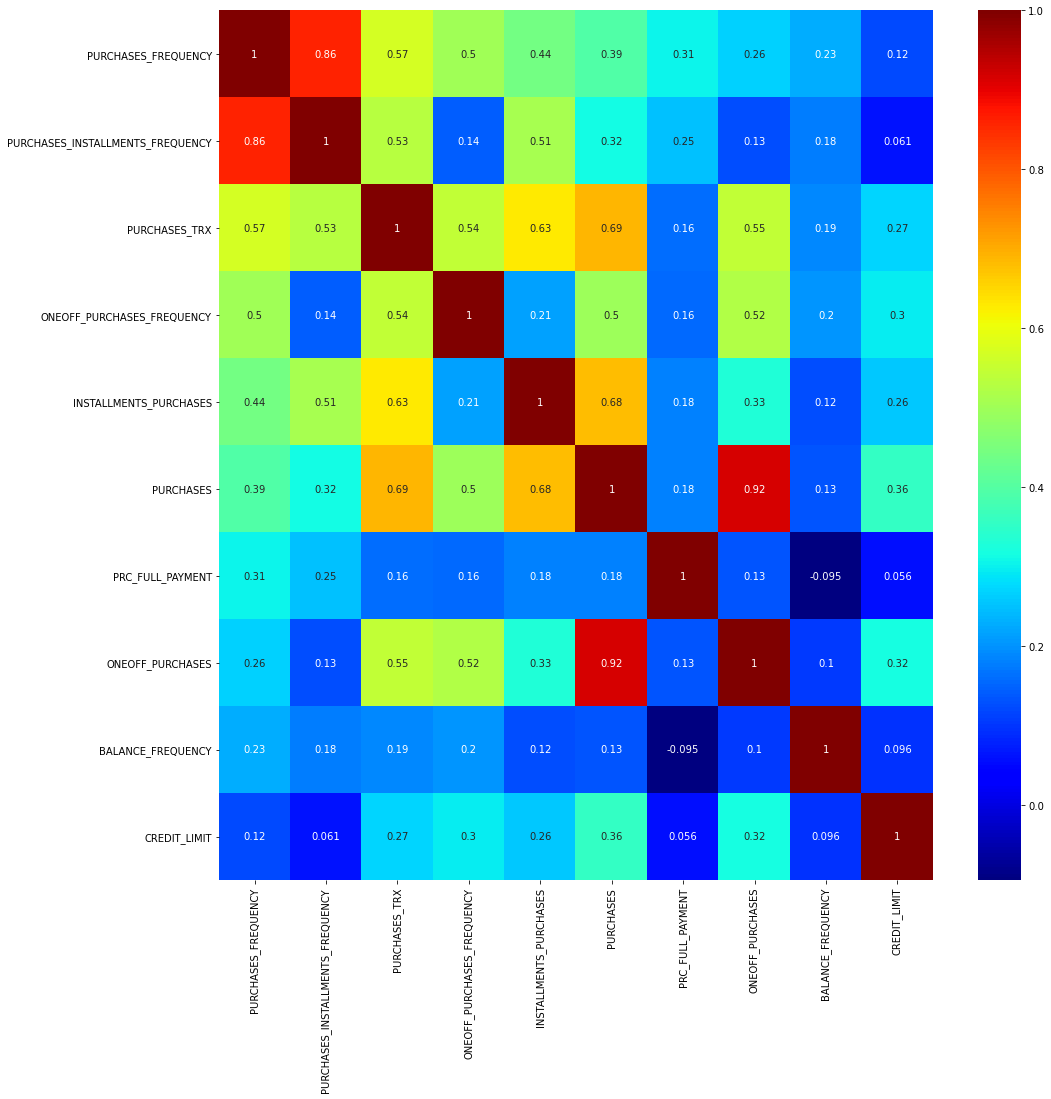

In [29]:
k = 10 #number of variables for heatmap
cols = df.corr().nlargest(k, 'PURCHASES_FREQUENCY')['PURCHASES_FREQUENCY'].index
cm = df[cols].corr()
plt.figure(figsize=(16,16))
sns.heatmap(cm, annot=True, cmap = 'jet')

In [43]:
fig = px.bar(df, x='CREDIT_LIMIT', y='MINIMUM_PAYMENTS')
fig.show()


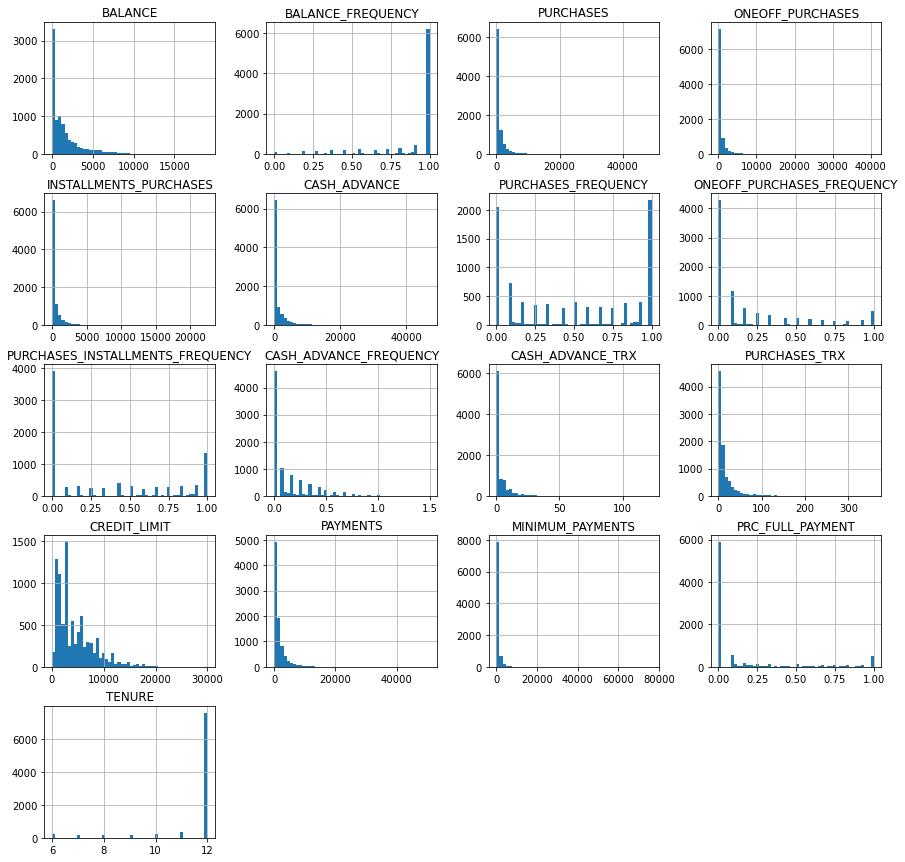

In [53]:
df.hist(bins=50, figsize=(15,15))
plt.show()

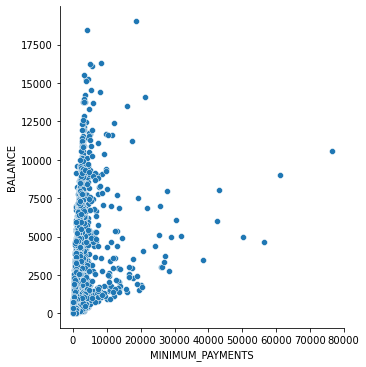

In [55]:
sns.relplot(x='MINIMUM_PAYMENTS',y='BALANCE',data=df)

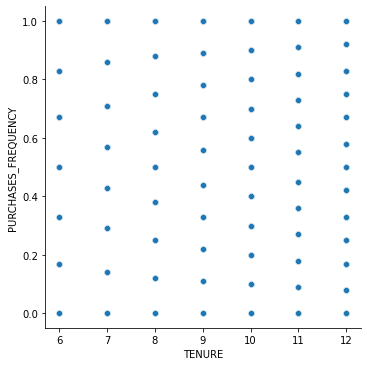

In [59]:
sns.relplot(x='TENURE',y='PURCHASES_FREQUENCY',data=df)

AS TENURE INCREASES PURCHASE FREQUENCY IS MORE WHICH SHOWS OLD CUSTOMERS PURCHASE MORE FREQUENTLY USING CC

In [71]:
plt.figure(figsize=(10,5))
px.scatter(x=df['MINIMUM_PAYMENTS'], y=df['CASH_ADVANCE_FREQUENCY'])

<Figure size 720x360 with 0 Axes>

TypeError: string indices must be integers